# Phone prices
---

#### Name: 沈家駿
#### Student ID: 0712223

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler

## Data Input

In [2]:
df = pd.read_csv('sogi_mobile.csv')
df.columns

Index(['Price', 'ROM儲存空間', '主螢幕尺寸', '主相機畫素', '主相機光學防手震', '主相機UHD 4K錄影',
       '第二主相機畫素', '前相機畫素', '前相機UHD 4K錄影', 'NFC', '快充功率', '無線充電', '機身長度',
       '機身寬度', '機身厚度', '機身重量', '防水防塵等級', '機身顏色', 'Brand', '第三主相機畫素', 'RAM記憶體',
       '電池容量', '主相機8K錄影', '3.5mm耳機孔', '記憶卡', 'RAW檔拍攝', '可替換電池', '無線反向充電',
       '第四主相機畫素', '副螢幕觸控', '第二前相機畫素', 'soc_s', 'soc_m', 'resolution_x',
       'resolution_y', 'OLED', '90Hz', '120Hz', '144Hz', 'Wifi5G', 'Wifi6',
       'bt5.0', 'bt5.1', 'bt5.2', 'bt4.2', 'UFS', 'cam_back_num', 'glass',
       'plastic', '摺疊螢幕', 'USB3'],
      dtype='object')

In [3]:
df.shape

(201, 51)

## Data Processing & Visualization

### Divide the data into X(features) and y(labels).

In [4]:
y = df['Price']
X = df.drop(['Price'], axis=1)
# Without brand
X_wo_brand = df.drop(['Price', 'Brand'], axis=1)

### Plot the distribution of Prices(y)

In [5]:
def visulization(x, title, featureName, binSz, colorName, axs, seq=None):
    sns.set_theme()
    # print('\taverage:',x.mean())
    # print('\tstandard deviation:',x.std())
    xMean = '{:.2f}'.format(x.mean())
    xStd = '{:.2f}'.format(x.std())
    
    if seq is None:
        subplt = axs
    else:
        subplt = axs[seq//2,seq%2]
    subplt.hist(x, bins = binSz, color=colorName)
    subplt.set_title(title+'\naverage: '+xMean+'  standard deviation: '+xStd)
    subplt.set_xlabel(featureName)
    subplt.set_ylabel("cnt")

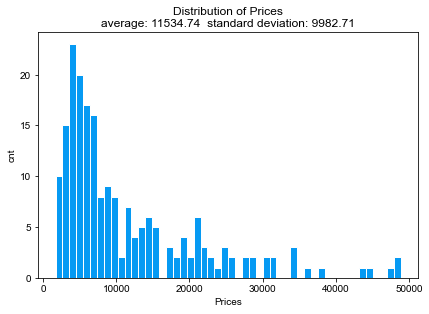

In [6]:
fig, ax = plt.subplots()
plt.tight_layout()
visulization(y, 'Distribution of Prices', 'Prices', 50, '#069AF3', ax)

### Classify y by  Quantile

In [7]:
print('Quantile:')
display(pd.DataFrame([[y.quantile(.25), y.quantile(.5), y.quantile(.75)]], columns=['Q1','Q2','Q3'], index=['Price']))

Quantile:


,Q1,Q2,Q3
Price,4600.0,7290.0,15290.0


In [8]:
def quantile_stratify(score):
    if score >= y.quantile(.75):
        return 0
    elif score >= y.quantile(.5):
        return 1
    elif score >= y.quantile(.25):
        return 2
    else:
        return 3
y_quantile = pd.Series(list(map(quantile_stratify, list(y))))

In [9]:
lable_level = ['Top 25%', 'Top 25-50%', 'Last 25-50%', 'Last 25%']
cm_row_level = list(map(lambda x: 'Predicted '+x, list(lable_level)))
cm_col_level = list(map(lambda x: 'Actual '+x, list(lable_level)))

In [10]:
def show_feature(f, bar_num=50):
    fig, axs = plt.subplots(2, 2, figsize=(10,7))
    visulization(df[y_quantile==0][f], 'Distribution of '+f +' in '+lable_level[0], f, bar_num, '#069AF3',axs, 0)
    visulization(df[y_quantile==1][f], 'Distribution of '+f+' in '+lable_level[1], f, bar_num, '#069AF3',axs, 1)
    visulization(df[y_quantile==2][f], 'Distribution of '+f+' in '+lable_level[2], f, bar_num, '#069AF3',axs, 2)
    visulization(df[y_quantile==3][f], 'Distribution of '+f+' in '+lable_level[3], f, 50, '#069AF3',axs, 3)
    fig.tight_layout()

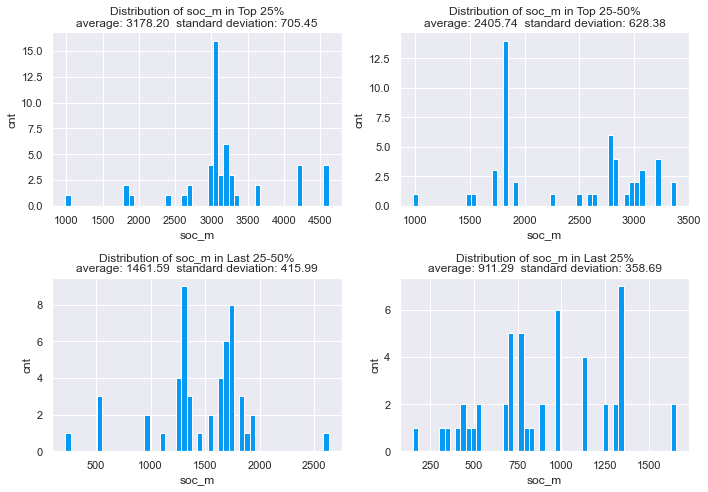

In [11]:
show_feature('soc_m')

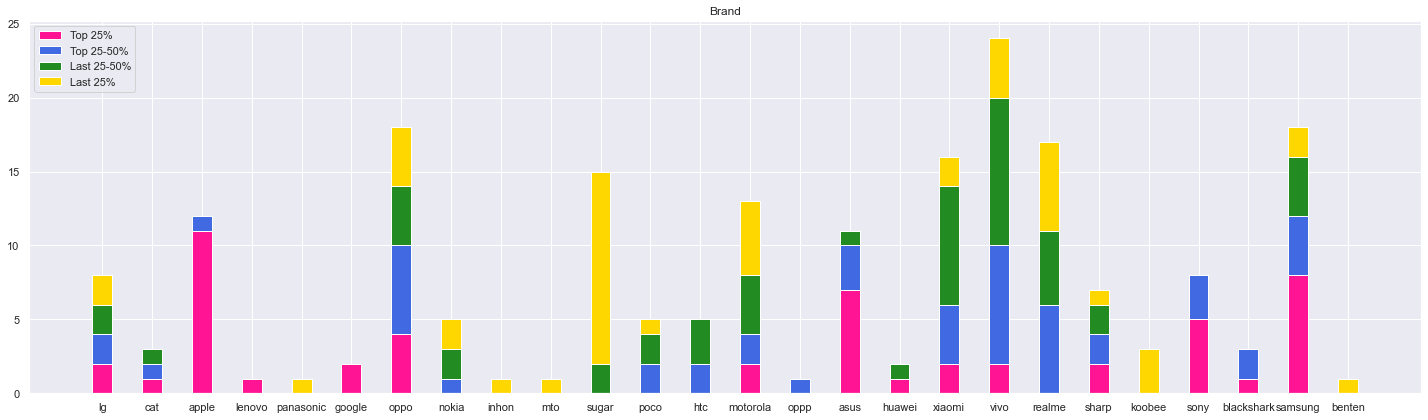

In [12]:
f='Brand'
d_1 = dict(df[y_quantile==0][f].value_counts())
d_2 = dict(df[y_quantile==1][f].value_counts())
d_3 = dict(df[y_quantile==2][f].value_counts())
d_4 = dict(df[y_quantile==3][f].value_counts())
keys = list(set(list(d_1)+list(d_2)+list(d_3)+list(d_4)))

val_1 = np.array([d_1.get(key, 0) for key in keys])
val_2 = np.array([d_2.get(key, 0) for key in keys])
val_3 = np.array([d_3.get(key, 0) for key in keys])
val_4 = np.array([d_4.get(key, 0) for key in keys])


fig, axs = plt.subplots(figsize=(20,6))
plt.bar(keys,val_1,color='deeppink',label=lable_level[0],width = 0.4)
plt.bar(keys,val_2,color='royalblue',label=lable_level[1],bottom=val_1,width = 0.4)
plt.bar(keys,val_3,color='forestgreen',label=lable_level[2],bottom=val_1+val_2,width = 0.4)
plt.bar(keys,val_4,color='gold',label=lable_level[3],bottom=val_1+val_2+val_3,width = 0.4)
plt.legend(lable_level, loc="upper left")
plt.title(f)
fig.tight_layout()
plt.show()

In [13]:
X = pd.get_dummies(X)
features_dummies = X.columns
X = X.to_numpy()

X_wo_brand = pd.get_dummies(X_wo_brand)
features_dummies_wo_brand = X_wo_brand.columns
X_wo_brand = X_wo_brand.to_numpy()

In [14]:
features_dummies

Index(['ROM儲存空間', '主螢幕尺寸', '主相機畫素', '主相機光學防手震', '主相機UHD 4K錄影', '第二主相機畫素',
       '前相機畫素', '前相機UHD 4K錄影', 'NFC', '快充功率', '無線充電', '機身長度', '機身寬度', '機身厚度',
       '機身重量', '防水防塵等級', '機身顏色', '第三主相機畫素', 'RAM記憶體', '電池容量', '主相機8K錄影',
       '3.5mm耳機孔', '記憶卡', 'RAW檔拍攝', '可替換電池', '無線反向充電', '第四主相機畫素', '副螢幕觸控',
       '第二前相機畫素', 'soc_s', 'soc_m', 'resolution_x', 'resolution_y', 'OLED',
       '90Hz', '120Hz', '144Hz', 'bt5.0', 'bt5.1', 'bt5.2', 'bt4.2', 'UFS',
       'cam_back_num', 'glass', 'plastic', '摺疊螢幕', 'USB3', 'Brand_apple',
       'Brand_asus', 'Brand_benten', 'Brand_blackshark', 'Brand_cat',
       'Brand_google', 'Brand_htc', 'Brand_huawei', 'Brand_inhon',
       'Brand_koobee', 'Brand_lenovo', 'Brand_lg', 'Brand_motorola',
       'Brand_mto', 'Brand_nokia', 'Brand_oppo', 'Brand_oppp',
       'Brand_panasonic', 'Brand_poco', 'Brand_realme', 'Brand_samsung',
       'Brand_sharp', 'Brand_sony', 'Brand_sugar', 'Brand_vivo',
       'Brand_xiaomi', 'Wifi5G_False', 'Wifi5G_True', 'Wifi6_False'

In [15]:
features_dummies_wo_brand

Index(['ROM儲存空間', '主螢幕尺寸', '主相機畫素', '主相機光學防手震', '主相機UHD 4K錄影', '第二主相機畫素',
       '前相機畫素', '前相機UHD 4K錄影', 'NFC', '快充功率', '無線充電', '機身長度', '機身寬度', '機身厚度',
       '機身重量', '防水防塵等級', '機身顏色', '第三主相機畫素', 'RAM記憶體', '電池容量', '主相機8K錄影',
       '3.5mm耳機孔', '記憶卡', 'RAW檔拍攝', '可替換電池', '無線反向充電', '第四主相機畫素', '副螢幕觸控',
       '第二前相機畫素', 'soc_s', 'soc_m', 'resolution_x', 'resolution_y', 'OLED',
       '90Hz', '120Hz', '144Hz', 'bt5.0', 'bt5.1', 'bt5.2', 'bt4.2', 'UFS',
       'cam_back_num', 'glass', 'plastic', '摺疊螢幕', 'USB3', 'Wifi5G_False',
       'Wifi5G_True', 'Wifi6_False', 'Wifi6_True'],
      dtype='object')

## Model

In [16]:
def run_model(model, X_, y_, num_class, k=3, need_pca=False, need_std=False, need_print_tree=False, need_sca=False, need_auc=False):
    ''' Run the model and output the metrics.
    '''
    kf = KFold(n_splits=k, shuffle = True)
    confusionMatrixSum = np.zeros([num_class, num_class])
    accuracySum = 0
    precisionSum = np.zeros([num_class])
    recallSum = np.zeros([num_class])

    for train_index, test_index in kf.split(X_):
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = y_[train_index], y_[test_index]
        
        if need_std:
            transfer = StandardScaler()
            X_train = transfer.fit_transform(X_train)
            X_test = transfer.transform(X_test)
        
        if need_sca:
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)
        
        if need_pca:
            pca = PCA(n_components='mle')
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_test = pca.transform(X_test)
        if need_auc:
            model.fit(X_train, y_train,eval_metric='auc')
        else:
            model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred).transpose()
        confusionMatrixSum += np.array(conf_matrix)

        accuracySum += sklearn.metrics.accuracy_score(y_test, y_pred)

        precision_temp, recall_temp, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred)
        precisionSum += np.array(precision_temp)
        recallSum += np.array(recall_temp)
    cm = confusionMatrixSum/k
    acc = accuracySum/k
    pc = precisionSum/k
    recall = recallSum/k
    
    return cm, acc, pc, recall

In [17]:
def show_metrics(metrics):
    cm, acc, pc, recall = metrics
    num_classes = pc.size
    cm_col = cm_col_binary if num_classes == 2 else cm_col_level
    cm_row = cm_row_binary if num_classes == 2 else cm_row_level
    lable = lable_binary if num_classes == 2 else lable_level
    
    display(pd.DataFrame(cm, index=cm_row, columns=cm_col))
    display(pd.DataFrame([acc], index=['Accuracy'], columns=['Avg.']))
    display(pd.DataFrame(pc.reshape(1, num_classes), index=['Precision'], columns=lable))
    display(pd.DataFrame(recall.reshape(1, num_classes), index=['Recall'], columns=lable))

In [18]:
cf = RandomForestClassifier(max_depth=20, n_estimators=100)
show_metrics(run_model(model=cf, X_=X, y_=y_quantile, num_class=4))

,Actual Top 25%,Actual Top 25-50%,Actual Last 25-50%,Actual Last 25%
Predicted Top 25%,14.000000,1.666667,0.000000,0.000000
Predicted Top 25-50%,2.666667,13.333333,2.000000,0.333333
Predicted Last 25-50%,0.000000,1.333333,11.333333,2.000000
Predicted Last 25%,0.333333,0.333333,3.666667,14.000000


,Avg.
Accuracy,0.78607


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Precision,0.903333,0.759503,0.776471,0.777778


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Recall,0.768627,0.801636,0.722956,0.856125


In [19]:
KNN = KNeighborsClassifier(n_neighbors=5)
show_metrics(run_model(model=KNN, X_=X, y_=y_quantile, num_class=4))

,Actual Top 25%,Actual Top 25-50%,Actual Last 25-50%,Actual Last 25%
Predicted Top 25%,11.666667,4.666667,0.000000,0.000000
Predicted Top 25-50%,4.666667,8.666667,2.333333,1.000000
Predicted Last 25-50%,0.333333,3.000000,11.333333,0.666667
Predicted Last 25%,0.333333,0.333333,3.333333,14.666667


,Avg.
Accuracy,0.691542


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Precision,0.712281,0.52774,0.734267,0.801542


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Recall,0.695938,0.516667,0.669312,0.905093


In [20]:
clf = XGBClassifier(
        n_estimators=200,
        learning_rate= 0.3,  
        max_depth=10, 
        reg_lambda=1,  
        use_label_encoder=False,   
        eval_metric= 'auc'
)

show_metrics(run_model(model=clf, X_=X, y_=y_quantile, num_class=4, need_auc=False))

,Actual Top 25%,Actual Top 25-50%,Actual Last 25-50%,Actual Last 25%
Predicted Top 25%,14.333333,4.000000,0.000000,0.000000
Predicted Top 25-50%,1.666667,9.000000,1.000000,0.000000
Predicted Last 25-50%,0.666667,3.333333,13.333333,2.333333
Predicted Last 25%,0.333333,0.333333,2.666667,14.000000


,Avg.
Accuracy,0.756219


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Precision,0.783838,0.710379,0.669444,0.798319


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Recall,0.872222,0.498316,0.786508,0.853236


In [21]:
decisionTree = DecisionTreeClassifier(max_depth=8)
show_metrics(run_model(model=decisionTree, X_=X, y_=y_quantile, num_class=4))

,Actual Top 25%,Actual Top 25-50%,Actual Last 25-50%,Actual Last 25%
Predicted Top 25%,14.000000,2.666667,0.000000,0.000000
Predicted Top 25-50%,2.666667,11.333333,2.000000,0.000000
Predicted Last 25-50%,0.000000,2.666667,11.333333,1.333333
Predicted Last 25%,0.333333,0.000000,3.666667,15.000000


,Avg.
Accuracy,0.771144


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Precision,0.849522,0.740741,0.744219,0.791033


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Recall,0.821225,0.67807,0.669556,0.927761


### W/o Brand

In [22]:
cf = RandomForestClassifier(max_depth=20, n_estimators=100)
show_metrics(run_model(model=cf, X_=X_wo_brand, y_=y_quantile, num_class=4))

,Actual Top 25%,Actual Top 25-50%,Actual Last 25-50%,Actual Last 25%
Predicted Top 25%,13.666667,2.333333,0.000000,0.000000
Predicted Top 25-50%,3.000000,12.000000,1.333333,0.000000
Predicted Last 25-50%,0.000000,2.000000,13.666667,2.666667
Predicted Last 25%,0.333333,0.333333,2.000000,13.666667


,Avg.
Accuracy,0.791045


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Precision,0.85014,0.734069,0.757239,0.834273


,Top 25%,Top 25-50%,Last 25-50%,Last 25%
Recall,0.80172,0.725221,0.801866,0.83268


## Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# pca = PCA(n_components='mle')
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.8867223102790548

In [24]:
y_pred_train = reg.predict(X_train)

Text(0, 0.5, 'Predict')

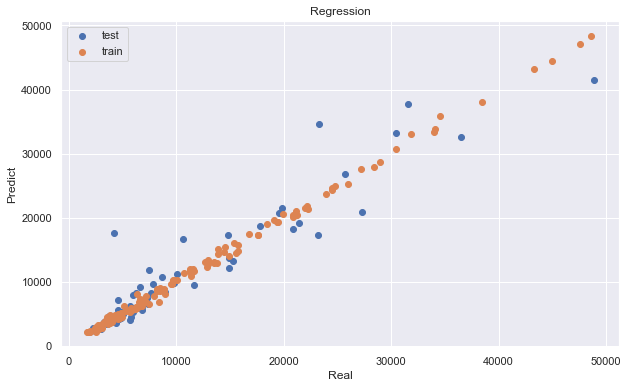

In [25]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, label='test')
plt.scatter(y_train, y_pred_train, label='train')

plt.legend(['test', 'train'], loc="upper left")
plt.title('Regression')
plt.xlabel('Real')
plt.ylabel('Predict')

## Cp

In [26]:
def test_cp(time):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    reg.score(X_test, y_test)
    
    test_index = list((y_pred > y_test).index)
    pos = []
    neg = []
    for i in test_index:
        if (y_pred > y_test)[i]:
            pos.append(i)
        elif (y_pred < y_test)[i]:
            neg.append(i)
    
    dict_all = dict(df.loc[test_index]['Brand'].value_counts())
    dict_pos = dict(df.loc[pos]['Brand'].value_counts())
    dict_neg = dict(df.loc[neg]['Brand'].value_counts())
    for b in df.Brand.unique():
        if b not in dict_all:
            dict_all[b] = 0
        if b not in dict_pos:
            dict_pos[b] = 0
        if b not in dict_neg:
            dict_neg[b] = 0
    
    for _ in range(time-1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        reg = GradientBoostingRegressor(random_state=0)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        reg.score(X_test, y_test)

        test_index = list((y_pred > y_test).index)
        pos = []
        neg = []
        for i in test_index:
            if (y_pred > y_test)[i]:
                pos.append(i)
            elif (y_pred < y_test)[i]:
                neg.append(i)
        tmp_dict = dict(df.loc[test_index]['Brand'].value_counts())
        tmp_pos = dict(df.loc[pos]['Brand'].value_counts())
        tmp_neg = dict(df.loc[neg]['Brand'].value_counts())
        
        for k in dict_all.keys():
            if k in tmp_dict:
                dict_all[k] += tmp_dict[k]
            if k in tmp_pos:
                dict_pos[k] += tmp_pos[k]    
            if k in tmp_neg:
                dict_neg[k] += tmp_neg[k]    
    return dict_all, dict_pos, dict_neg

In [27]:
dict_all, dict_pos, dict_neg = test_cp(100)

In [28]:
for k in dict_all.keys():
    print(k)
    if dict_all[k]!=0:
        print('\tpos:', dict_pos[k] /dict_all[k])
        print('\tneg:', dict_neg[k] /dict_all[k])    

sugar
	pos: 0.7917570498915402
	neg: 0.20824295010845986
vivo
	pos: 0.530812324929972
	neg: 0.469187675070028
apple
	pos: 0.49206349206349204
	neg: 0.5079365079365079
realme
	pos: 0.7276190476190476
	neg: 0.2723809523809524
oppo
	pos: 0.5607287449392713
	neg: 0.4392712550607287
lg
	pos: 0.41106719367588934
	neg: 0.5889328063241107
samsung
	pos: 0.4800693240901213
	neg: 0.5199306759098787
motorola
	pos: 0.5432098765432098
	neg: 0.4567901234567901
sony
	pos: 0.3178294573643411
	neg: 0.6821705426356589
xiaomi
	pos: 0.6146044624746451
	neg: 0.385395537525355
panasonic
	pos: 0.34210526315789475
	neg: 0.6578947368421053
koobee
	pos: 0.8470588235294118
	neg: 0.15294117647058825
poco
	pos: 0.8841463414634146
	neg: 0.11585365853658537
sharp
	pos: 0.49473684210526314
	neg: 0.5052631578947369
cat
	pos: 0.4222222222222222
	neg: 0.5777777777777777
asus
	pos: 0.5572289156626506
	neg: 0.4427710843373494
benten
	pos: 0.9615384615384616
	neg: 0.038461538461538464
blackshark
	pos: 0.5189873417721519
	ne